In [ ]:
from absl import logging

import matplotlib.pyplot as plt
import numpy as np
from PIL import Image, ImageOps
from scipy.spatial import cKDTree
from skimage.feature import plot_matches
from skimage.measure import ransac
from skimage.transform import AffineTransform
from six import BytesIO

import tensorflow as tf

import tensorflow_hub as hub
# from six.moves.urllib.request import urlopen

: 

In [3]:
def download_and_resize(path, new_width=256, new_height=256):
  # path = tf.keras.utils.get_file(url.split('/')[-1], url)
  image = Image.open(path)
  image = ImageOps.fit(image, (new_width, new_height), Image.ANTIALIAS)
  return image

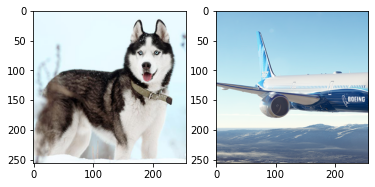

In [4]:
image1 = download_and_resize('D:/Rohit/ORG India/images/husky.jpg')
image2 = download_and_resize('D:/Rohit/ORG India/images/craft.png')

plt.subplot(1,2,1)
plt.imshow(image1)
plt.subplot(1,2,2)
plt.imshow(image2)

In [11]:
delf = hub.load('https://tfhub.dev/google/delf/1').signatures['default']

In [14]:
def run_delf(image):
  np_image = np.array(image)
  float_image = tf.image.convert_image_dtype(np_image, tf.float32)

  return delf(
      image=float_image,
      score_threshold=tf.constant(100.0),
      image_scales=tf.constant([0.25, 0.3536, 0.5, 0.7071, 1.0, 1.4142, 2.0]),
      max_feature_num=tf.constant(1000))

In [15]:
result1 = run_delf(image1)
result2 = run_delf(image2)

TypeError: pruned(score_threshold, image_scales, max_feature_num, image): expected argument #3(zero-based) to be a Tensor; got ndarray ([[[234 249 255]
  [234 249 255]
  [234 249 255]
  ...
  [235 250 255]
  [235 250 255]
  [235 250 255]]

 [[234 249 255]
  [234 249 255]
  [234 249 255]
  ...
  [235 250 255]
  [235 250 255]
  [235 250 255]]

 [[234 249 255]
  [234 249 255]
  [234 249 255]
  ...
  [235 250 255]
  [235 250 255]
  [235 250 255]]

 ...

 [[236 248 249]
  [232 242 244]
  [217 228 230]
  ...
  [250 254 255]
  [250 254 255]
  [250 254 255]]

 [[232 244 246]
  [226 236 238]
  [211 221 222]
  ...
  [249 253 254]
  [249 253 254]
  [249 253 254]]

 [[226 237 239]
  [217 227 229]
  [201 211 212]
  ...
  [248 252 253]
  [248 252 253]
  [248 252 253]]])